In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Define image dimensions
img_height, img_width = 224, 224  

# Define class indices
class_indices = {
    'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2,
    'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5,
    'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7,
    'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9,
    'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___Black_rot': 12,
    'Grape___Esca_(Black_Measles)': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
    'Grape___healthy': 15, 'Orange___Haunglongbing_(Citrus_greening)': 16,
    'Peach___Bacterial_spot': 17, 'Peach___healthy': 18, 'Pepper,_bell___Bacterial_spot': 19,
    'Pepper,_bell___healthy': 20, 'Potato___Early_blight': 21, 'Potato___Late_blight': 22,
    'Potato___healthy': 23, 'Raspberry___healthy': 24, 'Soybean___healthy': 25,
    'Squash___Powdery_mildew': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28,
    'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_blight': 31,
    'Tomato___Leaf_Mold': 32, 'Tomato___Septoria_leaf_spot': 33,
    'Tomato___Spider_mites Two-spotted_spider_mite': 34, 'Tomato___Target_Spot': 35,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 36, 'Tomato___Tomato_mosaic_virus': 37,
    'Tomato___healthy': 38
}

# Get the class labels
class_labels = {v: k for k, v in class_indices.items()}

# Prediction Logic
def predict_image(model, img_path, class_indices):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch axis
    img_array /= 255.0  # Normalize pixel values

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Check if the predicted probability is below a threshold
    confidence_threshold = 0.5  # Adjust this threshold as needed
    confidence = predictions[0][predicted_class_index]

    if confidence < confidence_threshold:
        result = 'Unknown Class'
    else:
        result = class_labels[predicted_class_index]

    print(f"Predicted class: {result}, Confidence: {confidence:.2f}")
    return result

# Example usage:
if __name__ == "__main__":
    # Load the best saved model
    best_model = load_model('MobileNetModel_best.h5')

    # Path to the image you want to predict
    test_image_path = 'Leaf-Dataset/test/Strawberry___healthy/image (12).JPG' 

    # Make a prediction
    predict_image(best_model, test_image_path, class_indices)


1/1 [==============================] - 2s 2s/step
Predicted class: Strawberry___healthy, Confidence: 1.00


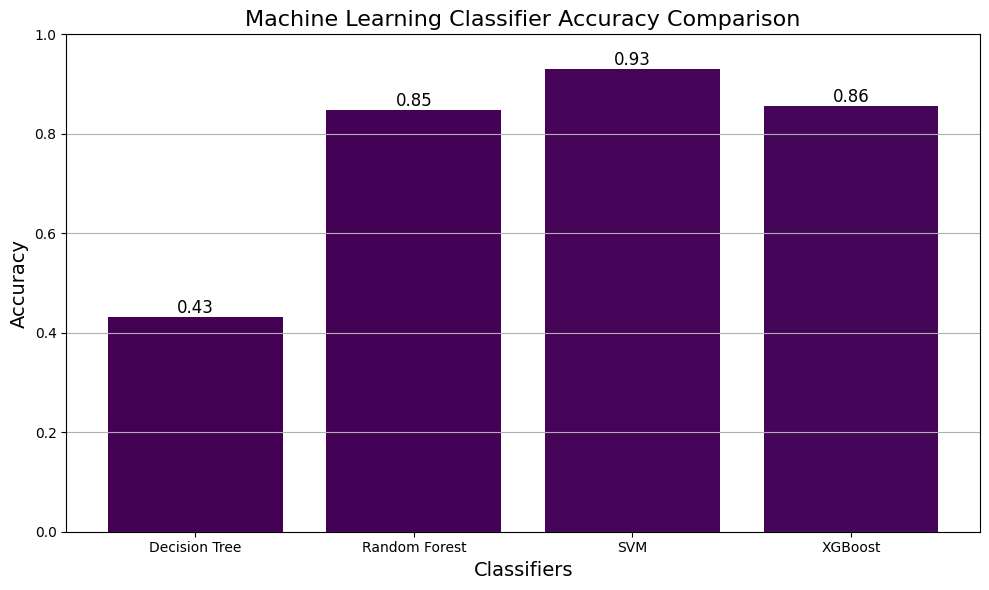

In [2]:
import matplotlib.pyplot as plt

# Classifier names and their accuracies
classifiers = [
    'Decision Tree', 
    'Random Forest', 
    'SVM', 
    'XGBoost'
]
accuracies = [
    0.43205128205128207,
    0.8474358974358974,
    0.9294871794871795,
    0.8551282051282051
]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color=plt.cm.viridis(range(len(accuracies))))

# Add titles and labels
plt.title('Machine Learning Classifier Accuracy Comparison', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits to show accuracy percentage

# Adding accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Show grid for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

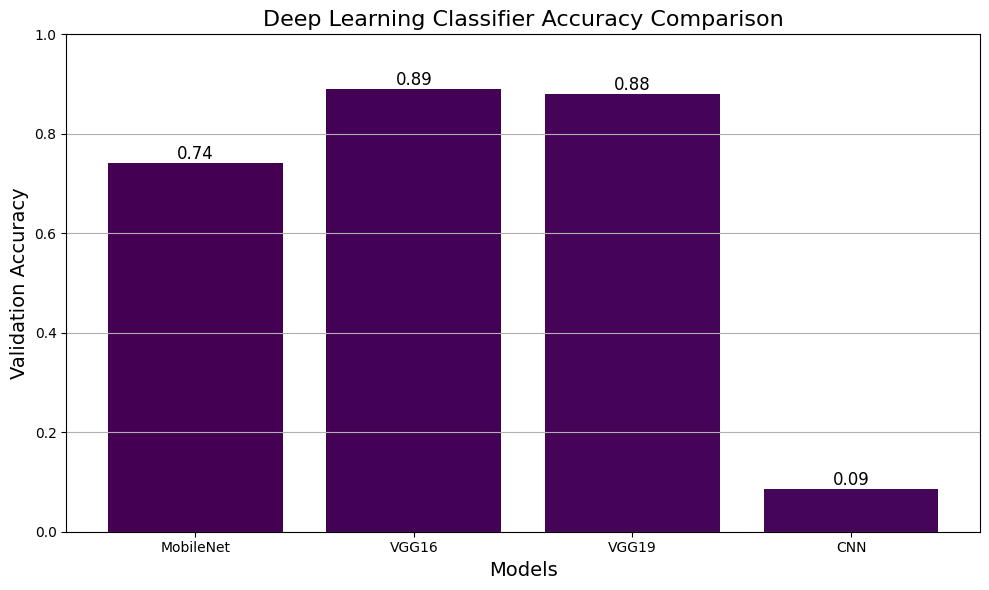

In [3]:
import matplotlib.pyplot as plt

# Model names and their validation accuracies
models = [
    'MobileNet', 
    'VGG16', 
    'VGG19', 
    'CNN'
]
val_accuracies = [
    0.7423,  # MobileNet
    0.8910,  # VGG16
    0.8808,  # VGG19
    0.0865   # CNN
]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, val_accuracies, color=plt.cm.viridis(range(len(val_accuracies))))

# Add titles and labels
plt.title('Deep Learning Classifier Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits to show accuracy percentage

# Adding accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Show grid for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()